In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [27]:
data = pd.read_csv('model_outputs_final.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

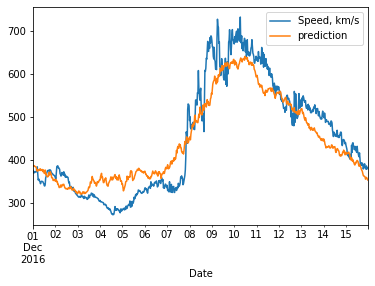

In [28]:
# To see performance on a coronal hole in 2016
data.loc['2016-12-01':'2016-12-15'].plot(y=['Speed, km/s', 'prediction'])
plt.show()

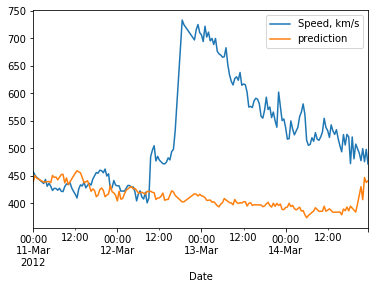

In [29]:
# To see a missed CME in 2012
data.loc['2012-03-11':'2012-03-14'].plot(y=['Speed, km/s', 'prediction'])
plt.show()

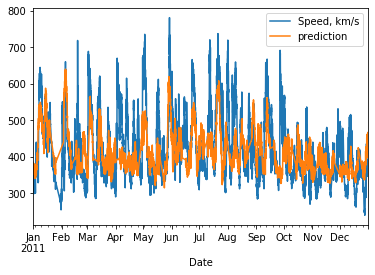

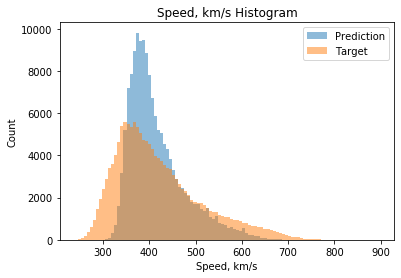

RMSE 2011 73.89288983431618
Correlation 2011 0.6143529089149338


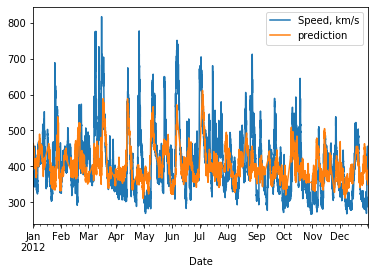

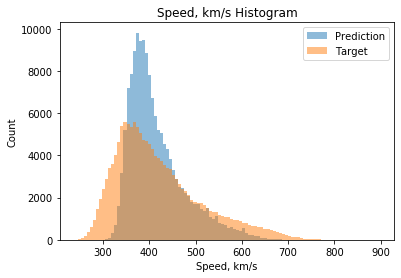

RMSE 2012 73.89288983431618
Correlation 2012 0.6143529089149338


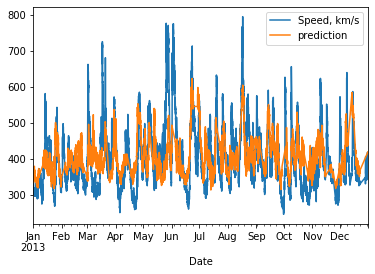

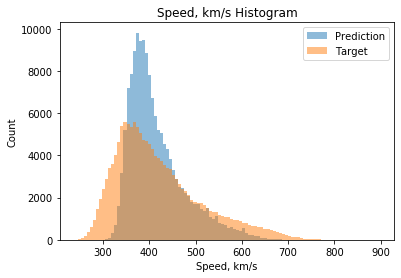

RMSE 2013 73.89288983431618
Correlation 2013 0.6143529089149338


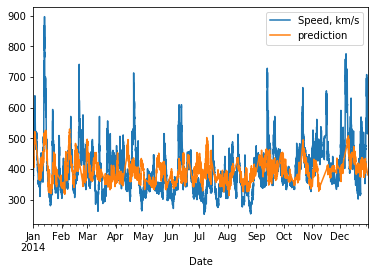

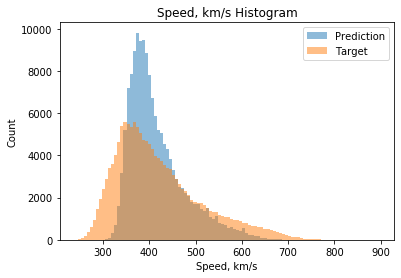

RMSE 2014 73.89288983431618
Correlation 2014 0.6143529089149338


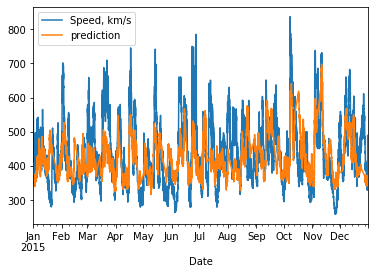

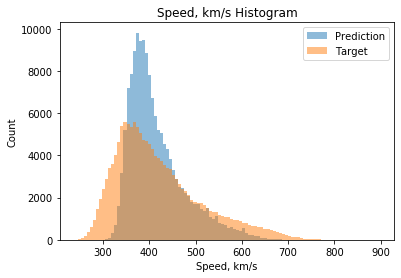

RMSE 2015 73.89288983431618
Correlation 2015 0.6143529089149338


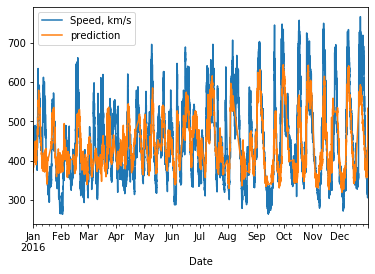

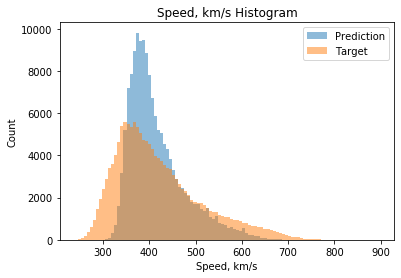

RMSE 2016 73.89288983431618
Correlation 2016 0.6143529089149338


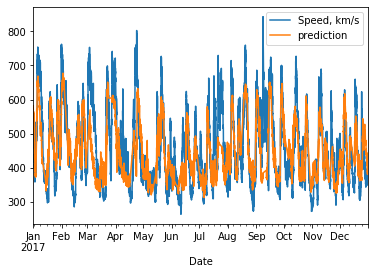

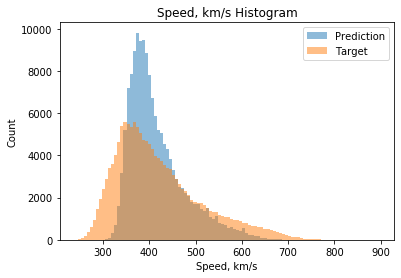

RMSE 2017 73.89288983431618
Correlation 2017 0.6143529089149338


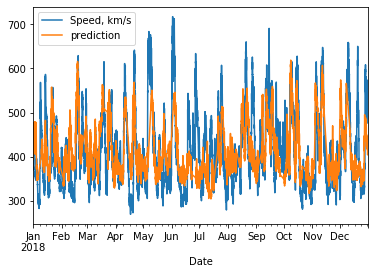

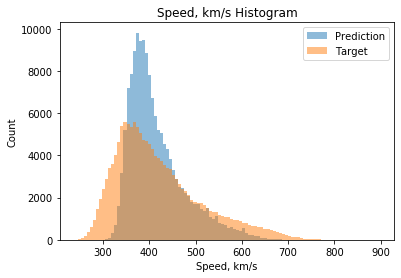

RMSE 2018 73.89288983431618
Correlation 2018 0.6143529089149338


In [32]:
# To see the performance for every half year
for year in range(2011, 2019):
    year_start = f'{year}-01-01 00:00:00'
    year_end = f'{year}-12-31 11:59:59'
    data[year_start:year_end].plot(y=['Speed, km/s', 'prediction'])
    predictions = data['prediction'].values
    real_speed = data['Speed, km/s'].values
    plt.show()
    plt.hist(predictions, 100, alpha=0.5, label='Prediction', range=(min(min(real_speed), min(predictions)), max(max(real_speed), max(predictions))))
    plt.hist(real_speed, 100, alpha=0.5, label='Target', range=(min(min(real_speed), min(predictions)), max(max(real_speed), max(predictions))))
    plt.xlabel('Speed, km/s')
    plt.ylabel('Count')
    plt.title(f'Speed, km/s Histogram')
    plt.legend(loc='upper right')
    plt.show()
    print(f'RMSE {year}', np.sqrt(mse(predictions, real_speed)))
    print(f'Correlation {year}', np.corrcoef(predictions, real_speed)[0,1])

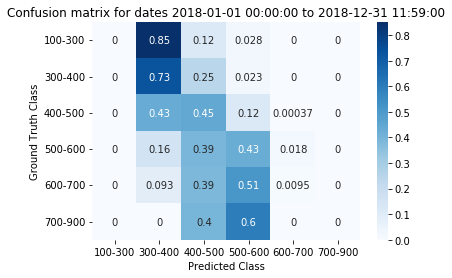

In [43]:
# To produce a confusion matrix
data = pd.read_csv('../model_outputs_final.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)
data = data.dropna()

start = '2018-01-01 00:00:00'
end = '2018-12-31 11:59:00'

data = data.loc[start:end, :]


# Define the bins for solar wind speeds
classes = {
    0: [100,300],
    2: [300,400],
    3: [400,500],
    4: [500,600],
    5: [600,700],
    6: [700,900],
}

# Apply classifications for each bin
def classification(row, label):
    for class_ in classes.keys():
        if row[label] >= classes[class_][0] and row[label] < classes[class_][1]:
            return class_
data = data.dropna()
data['real_class'] = data.apply(classification, axis=1, args=['Speed, km/s'])
data['prediction_class'] = data.apply(classification, axis=1, args=['prediction'])

# create and normalize the confusion matrix
cm = confusion_matrix(data['real_class'], data['prediction_class']).astype(float)
for row in range(cm.shape[0]):
    row_sum = int(np.sum(cm[row, :]))
    for col in range(cm.shape[0]):
        cm[row, col] = float(cm[row, col])/row_sum
        
# plot the confusion matrix
labels = [f'{thresh[0]}-{thresh[1]}' for thresh in classes.values()]
ax = sn.heatmap(cm, cmap='Blues', annot=True, xticklabels=labels, yticklabels=labels)
ax.set(xlabel='Predicted Class', ylabel='Ground Truth Class')
plt.setp(ax.get_yticklabels(), va="center")
plt.title(f'Confusion matrix for dates {start} to {end}')
plt.show()